 # Data Analysis Project 
 ## By Elton Mungai(email:eltonmungai65@outlook.com)
 
 # Analysis of Retail Supermarket chains

### Question 1 : Region with the best sales
### Question 2 : What was the most sold product Category ?
### Question 3 : Which State had the highest profit?
### Question 4 : What is each segments most popular product?
### Question 5 : Most used ship mode? And its relation to Segment

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
sp=pd.read_csv("/Users/eltonmungai/Desktop/DATA ANALYSIS/PYTHON/Powerpoints/superstore.csv")
sp.head(800)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Standard Class,Consumer,United States,Rochester,Minnesota,55901,Central,Office Supplies,Binders,20.1600,7,0.00,9.8784
796,First Class,Corporate,United States,Rochester,New York,14609,East,Office Supplies,Paper,132.7900,7,0.00,63.7392
797,First Class,Corporate,United States,Rochester,New York,14609,East,Office Supplies,Paper,12.9600,2,0.00,6.2208
798,First Class,Corporate,United States,Rochester,New York,14609,East,Office Supplies,Labels,21.5600,7,0.00,10.3488


## Question 1 : Region with the best sales


In [11]:
results=sp.groupby("Region")['Sales'].sum()
results

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

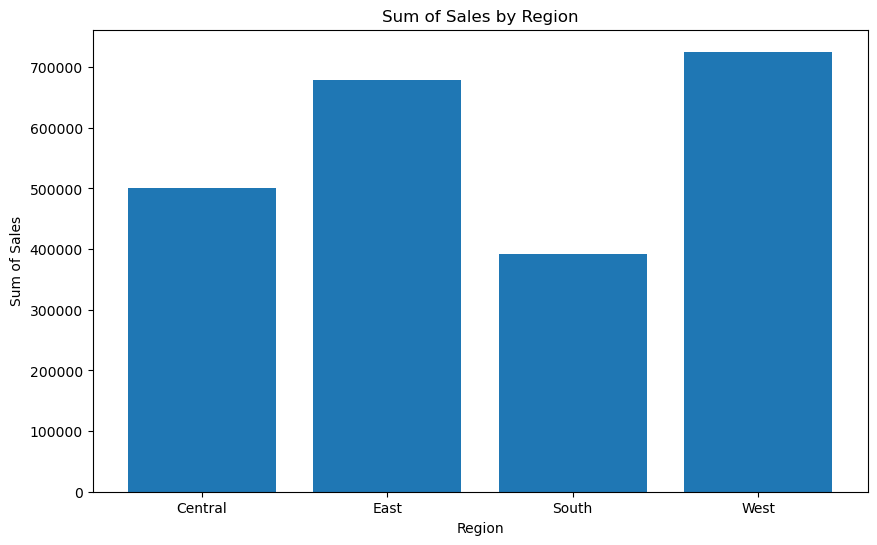

In [14]:
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
plt.bar(results.index, results.values)
plt.xlabel('Region')
plt.ylabel('Sum of Sales')
plt.title('Sum of Sales by Region')
plt.show()


In [16]:
region_sales = sp.groupby('Region')['Sales'].sum()

# Find the region with the highest sales
highest_sales_region = region_sales.idxmax()

# Print the region with the highest sales
print("Region with the highest sales:", highest_sales_region)

Region with the highest sales: West


## Question 2 : What was the most sold product Category ?

In [17]:
category_sales = sp.groupby('Category')['Quantity'].sum()
category_sales


Category
Furniture           8028
Office Supplies    22906
Technology          6939
Name: Quantity, dtype: int64

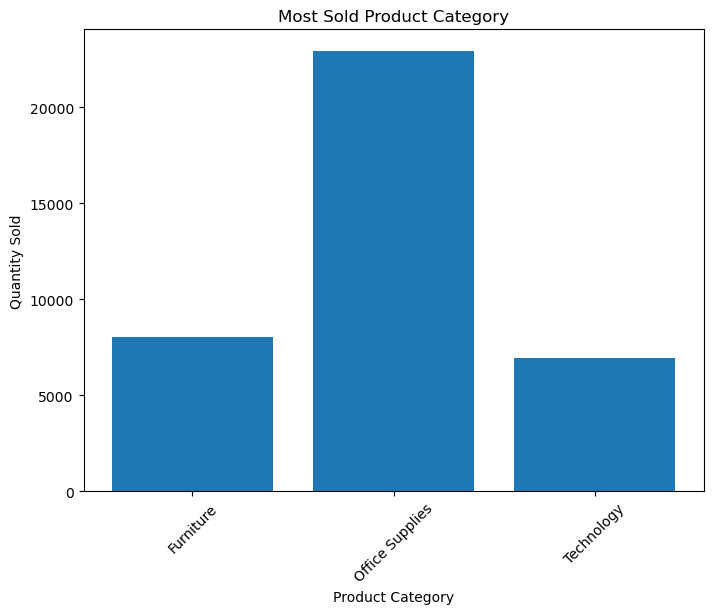

In [18]:
plt.figure(figsize=(8, 6))  # Set the figure size (width, height)
plt.bar(category_sales.index, category_sales.values)
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.title('Most Sold Product Category')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [19]:
most_sold_category = category_sales.idxmax()
print("Category with highest quantity sold:", most_sold_category)

Category with highest quantity sold: Office Supplies


## Question 3 : Which State had the highest profit?

In [21]:
city_profit = sp.groupby("State")["Profit"].sum()
city_profit

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
California              76381.3871
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12607.8870
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24463.1876
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire            1706.5028
New Jersey    

In [26]:
plt.figure(figsize=(80,120))
plt.bar(city_profit.index, city_profit.values)
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Profit made per State')
plt.xticks(rotation=80)  # Rotate the x-axis labels for better readability
plt.show()

In [25]:
highest_city_profit=city_profit.idxmax()
print("State  with highest profit made:", highest_city_profit)

State  with highest profit made: California


## Question 4 : What is each segments most popular product?

Most popular product for each segment:
        Segment   Most Popular Product
0     Consumer     (Consumer, Chairs)
1    Corporate    (Corporate, Chairs)
2  Home Office  (Home Office, Phones)


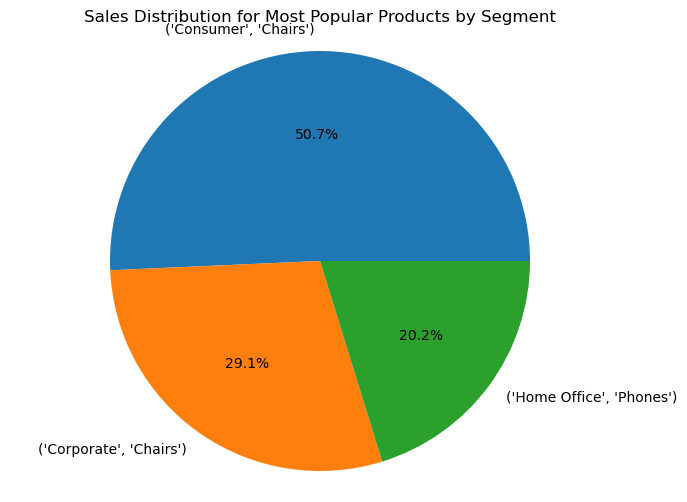

In [34]:
segment_subcategory_sales = sp.groupby(['Segment', 'Sub-Category'])['Sales'].sum()
segment_subcategory_sales

# Find the most popular product for each segment
most_popular_products = segment_subcategory_sales.groupby('Segment').idxmax().reset_index()
most_popular_products.columns = ['Segment', 'Most Popular Product']

# Print the most popular product for each segment
print("Most popular product for each segment:\n" ,most_popular_products)


# Find the sales of the most popular product for each segment
most_popular_product_sales = segment_subcategory_sales.groupby('Segment').max().reset_index()
most_popular_product_sales.columns = ['Segment', 'Sales']
most_popular_product_sales

# Draw a pie chart representing the sales distribution for the most popular products
plt.figure(figsize=(8, 6))  # Set the figure size (width, height)
plt.pie(most_popular_product_sales['Sales'], labels=most_popular_products['Most Popular Product'], autopct='%1.1f%%')
plt.title('Sales Distribution for Most Popular Products by Segment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Question 5 : Most used ship mode? And its relation to Segment

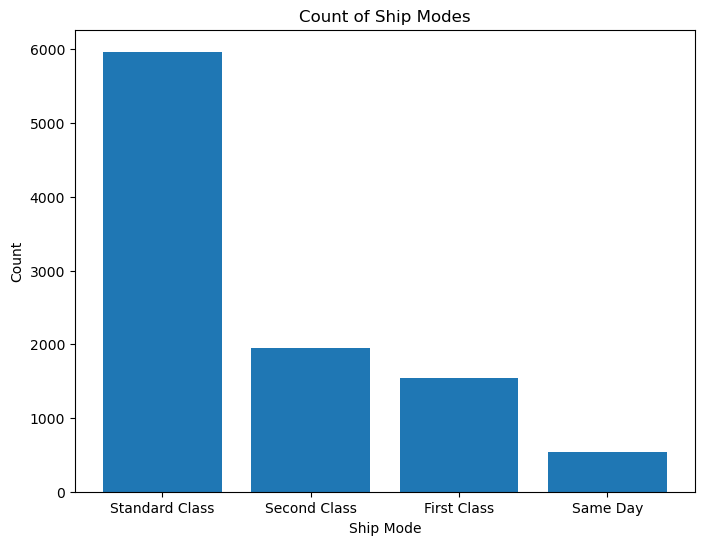

<Figure size 1000x600 with 0 Axes>

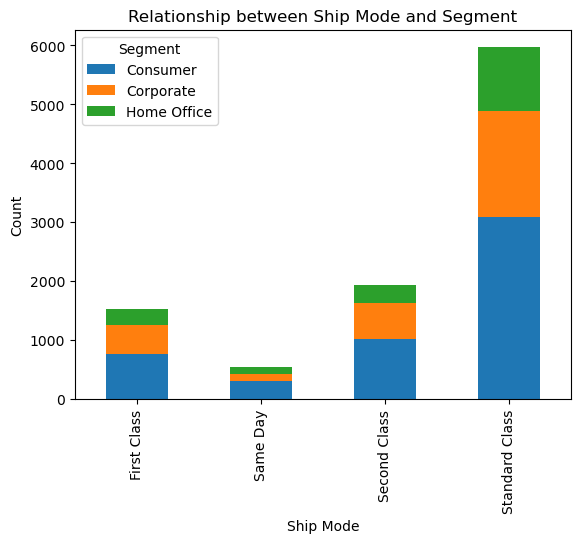

Most used ship mode: Standard Class


In [36]:
most_used_ship_mode = sp['Ship Mode'].mode().iloc[0]

# Create a bar graph to show the count of each ship mode
ship_mode_count = sp['Ship Mode'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(ship_mode_count.index, ship_mode_count.values)
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.title('Count of Ship Modes')
plt.show()

# Create a stacked bar graph to show the relationship between Ship Mode and Segment
ship_mode_segment_count = sp.groupby(['Ship Mode', 'Segment']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
ship_mode_segment_count.plot(kind='bar', stacked=True)
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.title('Relationship between Ship Mode and Segment')
plt.legend(title='Segment')
plt.show()

print("Most used ship mode:", most_used_ship_mode)

